In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [13]:
url = 'https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [12]:
print(df.median())

print(df.mode())



satisfaction_level         0.64
last_evaluation            0.72
number_project             4.00
average_montly_hours     200.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
dtype: float64
   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                 0.1             0.55             4.0                   135   
1                 NaN              NaN             NaN                   156   

   time_spend_company  Work_accident  left  promotion_last_5years department  \
0                 3.0            0.0   0.0                    0.0      sales   
1                 NaN            NaN   NaN                    NaN        NaN   

  salary  
0    low  
1    NaN  


<ipython-input-12-187dc1c51953>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df.median())


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000


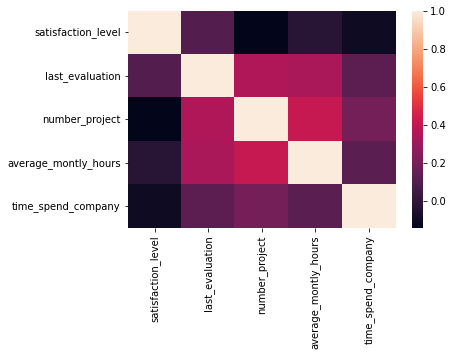

In [8]:
corr_matrix = df[['satisfaction_level',	'last_evaluation',	'number_project',	'average_montly_hours',	'time_spend_company']].corr()
sns.heatmap(corr_matrix)
plt.show
corr_matrix
#наиболее скоррелированы number_projects & average_monthly_hours
#наименее - average_monthly_hours & satisfaction_level

In [10]:
print(df['department'].value_counts())

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64


   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2 

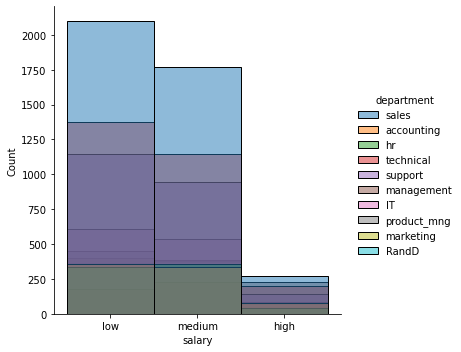

In [14]:
df['salary'] = pd.Categorical(df['salary'], categories=['low', 'medium', 'high'], ordered=True)
print(df.head())
def histo(data):
  
  sns.displot(data, x='salary', hue='department')
  #plt.legend(loc=data['department'])

  plt.show
histo(df)

""


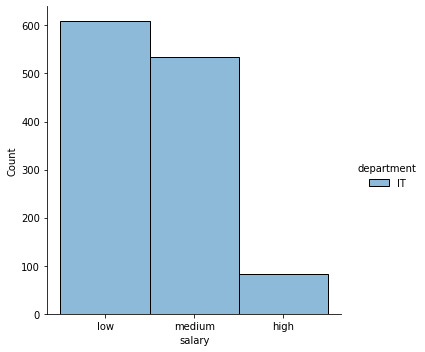

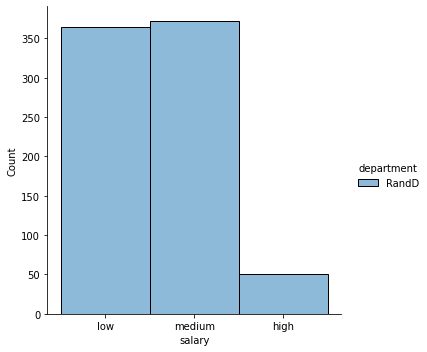

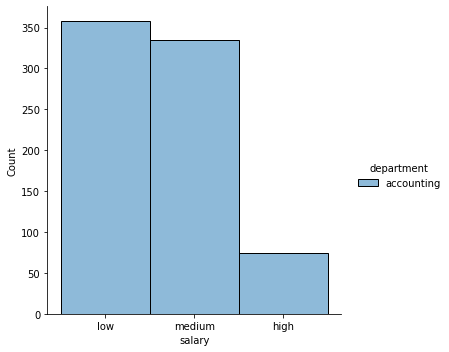

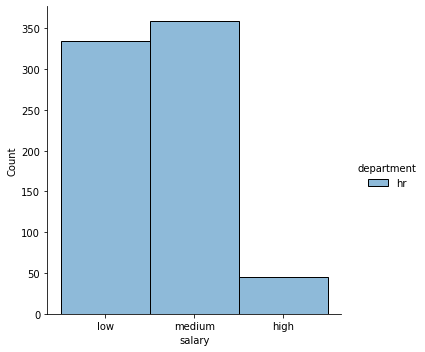

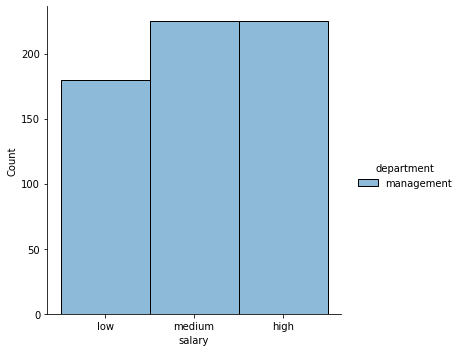

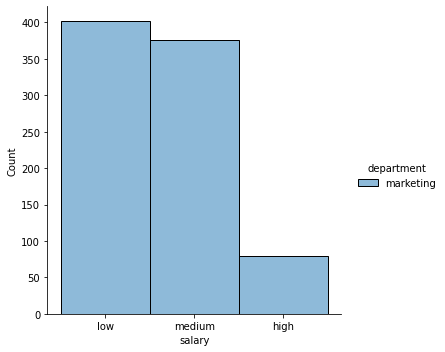

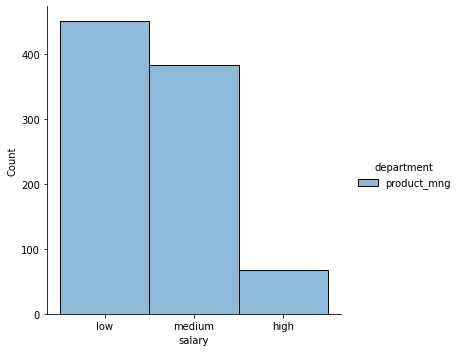

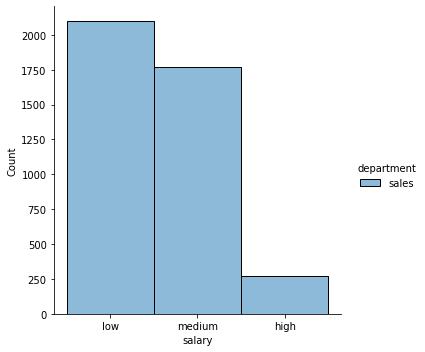

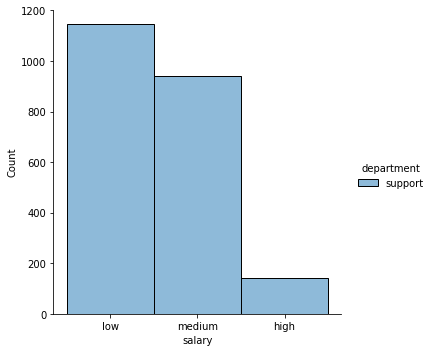

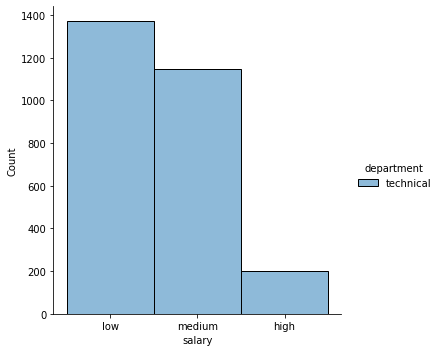

In [15]:
df.groupby('department').apply(histo)

In [25]:
high_salary = df.loc[df['salary']=='high']
low_salary = df.loc[df['salary']=='low']

print(stats.ttest_ind(a=high_salary['average_montly_hours'], b=low_salary['average_montly_hours'], alternative='greater'))
#pvalue>0.05, сотрудники с высоким окладом не проводят больше времени на рабочем месте чем сотрудники с низким

Ttest_indResult(statistic=-0.7288680398062308, pvalue=0.7669488260866371)


In [36]:
def indicators(group):

  promotion = len(group.loc[group['promotion_last_5years']==1]) / len(group['promotion_last_5years'])
  print('Доля сотрудников с повышением за последние 5 лет: ', promotion)
  print('Средняя степень удовлетворенности', group['satisfaction_level'].mean())
  print('Среднее количество проектов', group['number_project'].mean())

left = df.loc[df['left'] == 1]
working = df.loc[df['left'] == 0]
print('Показатели для работающих сотрудников')
indicators(working)

print('Показатели для уволившихся')
indicators(left)




Показатели для работающих сотрудников
Доля сотрудников с повышением за последние 5 лет:  0.026251312565628283
Средняя степень удовлетворенности 0.666809590479524
Среднее количество проектов 3.786664333216661
300
11428
Показатели для уволившихся
Доля сотрудников с повышением за последние 5 лет:  0.005320638476617194
Средняя степень удовлетворенности 0.4400980117614114
Среднее количество проектов 3.8555026603192384


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [43]:
X = df[['satisfaction_level',	'last_evaluation',	'number_project',	'average_montly_hours',	'time_spend_company',	'Work_accident',	'promotion_last_5years']]
y = df['left']
print(X.shape, y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

(14999, 7) (14999,)


In [41]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
lda.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))


0.7557777777777778

In [44]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, lda.predict(X_test), labels=[1,0])

array([[ 263,  809],
       [ 290, 3138]])